# Let's do PCA

In this demo we go multivariate applying PCA to the analysis of some of the dataset we described in the univariate visualization tutorial.

PCA in R can be performed with many different packages, here we will use two of them which are characterized by an optimal tradeoff between flexibility and ease to use. The two packages are `FactoMineR` and `factoextra`. An excellent introduction to their use can be found [here](http://www.sthda.com/english/wiki/factoextra-r-package-easy-multivariate-data-analyses-and-elegant-visualization)

Both packages are not part of the standard R installation. To directly install them just type

In [75]:
#install.packages("FactoMineR")
#install.packages("Factoextra")

## PCA of the Iris  Dataset
As before we start with the iris dataset. First of all er load the data and the two R packages

In [1]:
library(FactoMineR)
library(factoextra)
library(tidyverse)

## load the data in
data(iris)

## show the first lines
head(iris)

## tell me how big is the data table
dim(iris)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.2     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


[1] 150   5

In the perspective of the "course of dimensionality" here we are in a relatively good situation, 150 samples (points) are populating a four dimensional space, not bad!

The first step is now to perform the PCA on this dataset, in a sense this application is trivial because we have only four variables. However

In [12]:
## This code performs the PCA on the unit variance scalde data
irisPCA <- PCA(iris[,1:4],
               scale.unit = TRUE,
               graph = FALSE)
## as usual the summary function returns an informative textual summary of the results
summary(irisPCA)


Call:
PCA(X = iris[, 1:4], scale.unit = TRUE, graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4
Variance               2.918   0.914   0.147   0.021
% of var.             72.962  22.851   3.669   0.518
Cumulative % of var.  72.962  95.813  99.482 100.000

Individuals (the 10 first)
                 Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3
1            |  2.319 | -2.265  1.172  0.954 |  0.480  0.168  0.043 | -0.128
2            |  2.202 | -2.081  0.989  0.893 | -0.674  0.331  0.094 | -0.235
3            |  2.389 | -2.364  1.277  0.979 | -0.342  0.085  0.020 |  0.044
4            |  2.378 | -2.299  1.208  0.935 | -0.597  0.260  0.063 |  0.091
5            |  2.476 | -2.390  1.305  0.932 |  0.647  0.305  0.068 |  0.016
6            |  2.555 | -2.076  0.984  0.660 |  1.489  1.617  0.340 |  0.027
7            |  2.468 | -2.444  1.364  0.981 |  0.048  0.002  0.000 |  0.335
8            |  2.246 | -2.233  1.139  0.988 |  0.223  0.036  0.010

Let's look to some elements of the outputs:

* The **Call** part shows the PCA call
* The **Eigenvalues** part is the one showing the characteristics of the PCs. Here we have four PCs, and the first two together account for the 95% of the variance. Looking to the PC1XPC2 plane we expect then to have a quite representative model of the multivariate variance of our data.
* The **Individuals** speaks about the samples (only the first ten), so it contains the information on the __scores__
* The **Variables** part shows the weight of the "old" variable in the "new" direction. As an example we see that Petal.Length has a very low "weight" along the second PC (Dim.2). This part of the output describes the __loadings__. For the moment we disregard the other columns

As we discussed, the number of PCs to be considered to reconstruct a reasonably accurate representation of my data can be decided by considering the __screeplot__


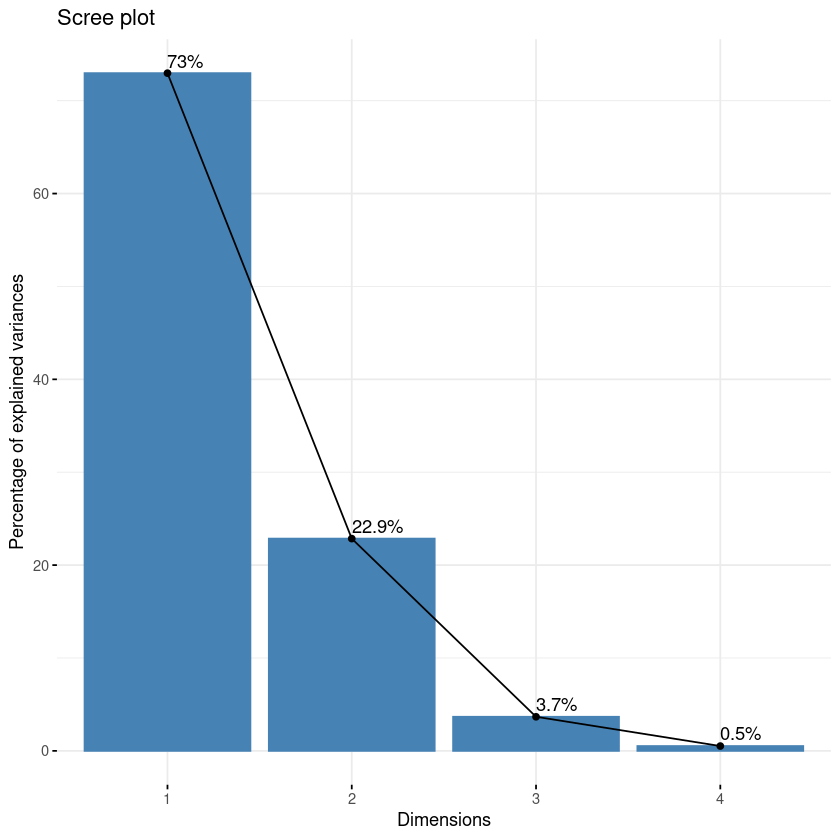

In [13]:
fviz_screeplot(irisPCA, addlabels = TRUE)

The graphical output tells us more or less what the text summary was suggesting. Two PCs should give a fairly good picture of the data.
Let's look to the PCA scoreplot (the projection of the samples in the PCA plane)

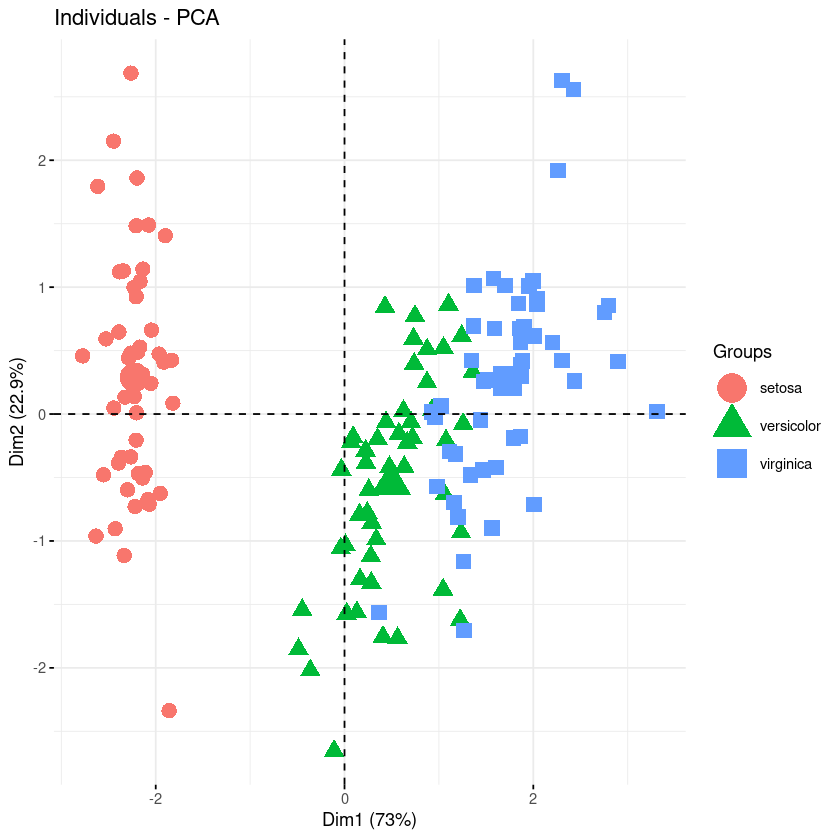

In [14]:
fviz_pca_ind(irisPCA, 
             habillage = iris$Species ,  ## use the specie as a color for the display
             label = "none",             ## hide individual labels
             repel = TRUE,                ## Avoid text overlapping (slow if many points)
             pointsize = 4)

The plot shows the position of the samples on the PC1 X PC2 plane. Each point is a sample. The plot can be further customized. To do that look to the STHDA website mentioned earlier, or to the help of the function `help(fviz_pca_ind)`.

**Observations**

* The separation between setosas and the other cultivars is bigger
* Dim1 is sufficient to clearly distinguish the three cultivars
* ...

The scoreplot gives only "half" of the infos resulting from the PCA, in fact it shows only the position of the individuals. In real life applications, however, we are also interested in the contribution of the variables we actually measured to the PCs. This is the content of the loadingsplot


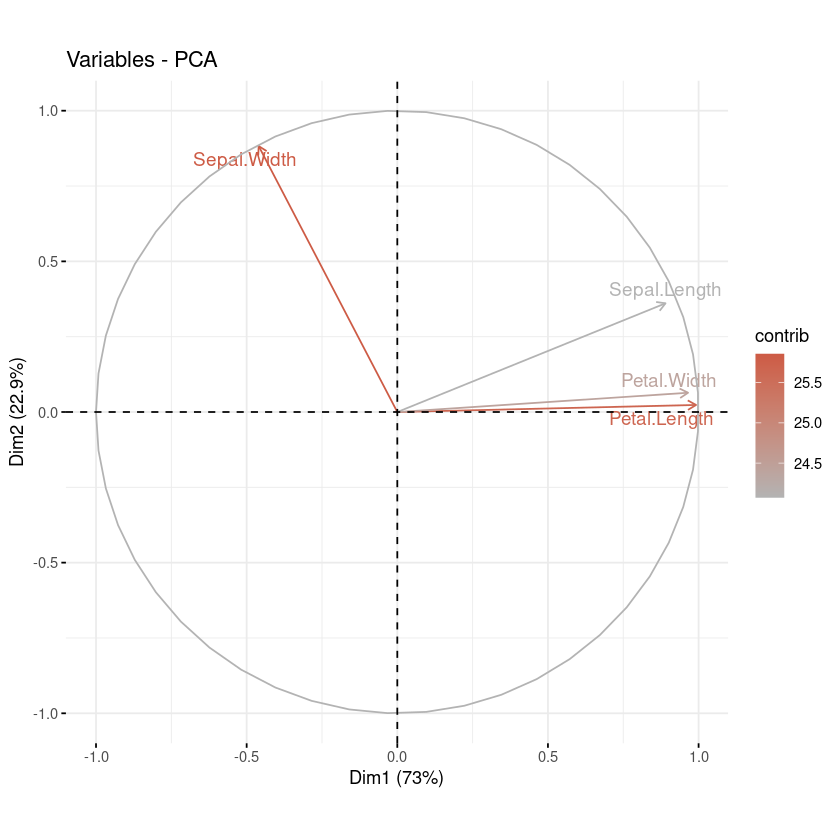

In [15]:
fviz_pca_var(irisPCA, col.var="contrib",
             gradient.cols = c("gray70", "coral3"),
             repel = TRUE # Avoid text overlapping
             )

This plot is also extremely informative. The shade of color highlights the contribution of the four initial variables on PC1 and PC2. Sepal.Width is important for PC2, while the other variables are more influential on PC1. Out of the "horizontal" three, Petal.Length is the one with the strongest weight on PC1. The direction of the arrows also tells that Petal.Width and Petal.Length are highly correlated (long arrows pointing on the same direction), while Sepal.Length and Sepal.Width are not correlated. 

On this aspect, however, remember that we are here looking only to a projection of the overall space and correlation/non correlation could arise only for projective reasons.

It is common to integrate the two previous plots into one single visualization called __biplot__

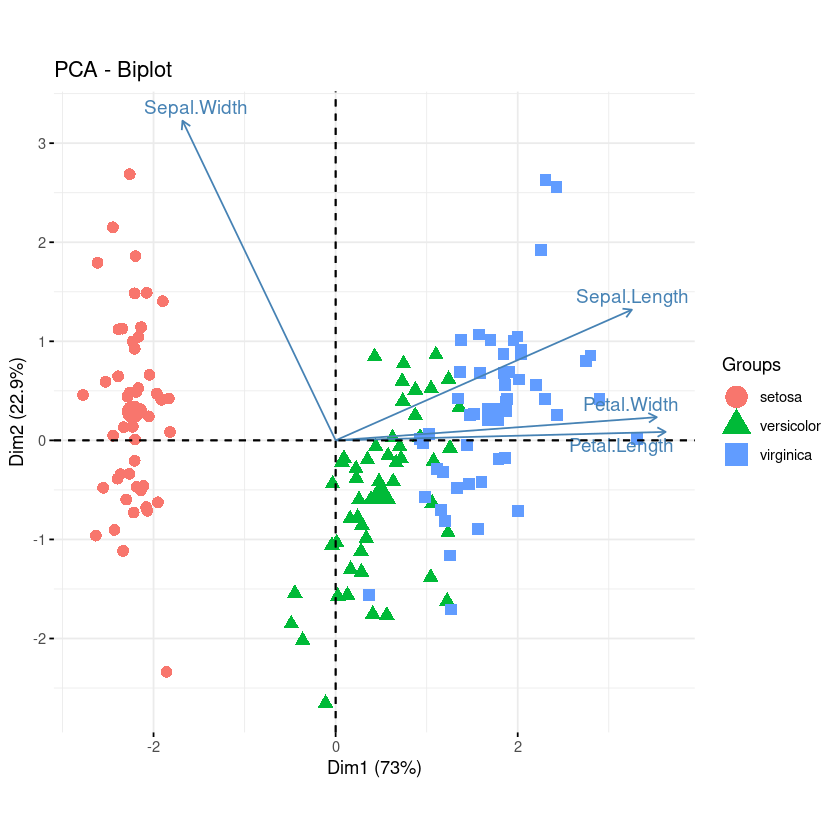

In [16]:
fviz_pca_biplot(irisPCA, 
                habillage = iris$Species,
                label = "var", # show variable names
                repel = TRUE,
                pointsize = 3) + 
  theme(aspect.ratio = 1)

This combined visualization allows also to identify the trends of the variables across the samples. The arrows are indeed pointing towards the sample showing an higher value of that specific variable. In our case, for example, Petal.Length is higher in virginica and lower in setosa.

The last point I would like to touch in this demo is the dependence of the PCA projection from the data. 

As discussed during the class, the characteristics of the PCA projection will change if new individuals are added to the dataset. For this reason, it is not always straightforward to compare two different PCAs. In order to show that, let's compare the previous representation with a new one were the initial PCA was performed only on versicolor and virginica.


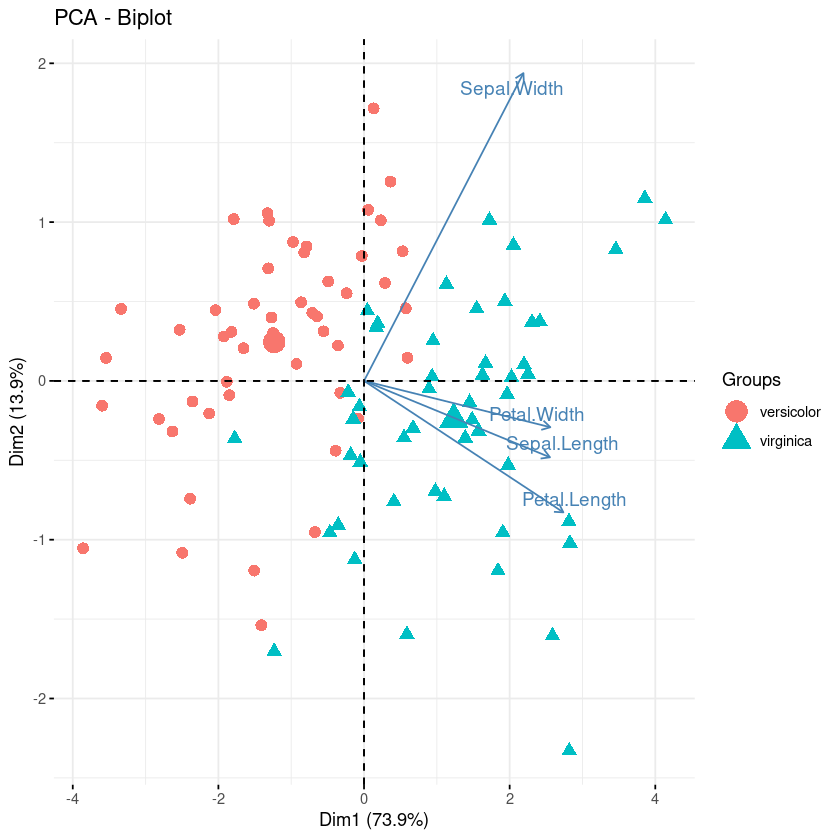

In [44]:

irissmall <- iris  %>% filter(Species != "setosa")

smallPCA <- PCA(irissmall[,1:4],
                scale.unit = TRUE,
                graph = FALSE)
fviz_pca_biplot(smallPCA, 
                habillage = irissmall$Species,
                label = "var", # show variable names
                repel = TRUE,
                pointsize = 3)



As you can see the representation is slightly different

A couple of interesting questions:

* where are showing up setosa samples in the previous representation?
* how well are we representing them?

The precess of "projecting" new samples on the PCA requires the following steps:

+ scale and "shift" the new samples with the parameters we used to construct the PCA (tricky!)
+ use the loadings to reconstruct the position of the new points in the PCA plane

Fortunately, `factominer` and `factoextra` provide function to do all that "on the fly" 

In [51]:
setosaproj <- predict(smallPCA, iris  %>% filter(Species == "setosa")  %>% select(-Species))
setosaproj$coord

Dim.1,Dim.2,Dim.3,Dim.4
-4.164035,4.161337,1.4763572,0.5290272
-4.974382,2.886510,1.1822326,0.5945681
-4.931737,3.536313,1.0079998,0.4631379
-5.007567,3.208997,0.8813896,0.2519914
-4.109619,4.463134,1.3880578,0.4177649
-2.969081,4.932418,1.5116967,0.5171330
-4.559590,4.028585,0.7641306,0.3274629
-4.306053,3.880232,1.3521130,0.4089750
-5.490167,2.785417,0.6399993,0.2851700
-4.897113,3.140306,1.3666492,0.3544878


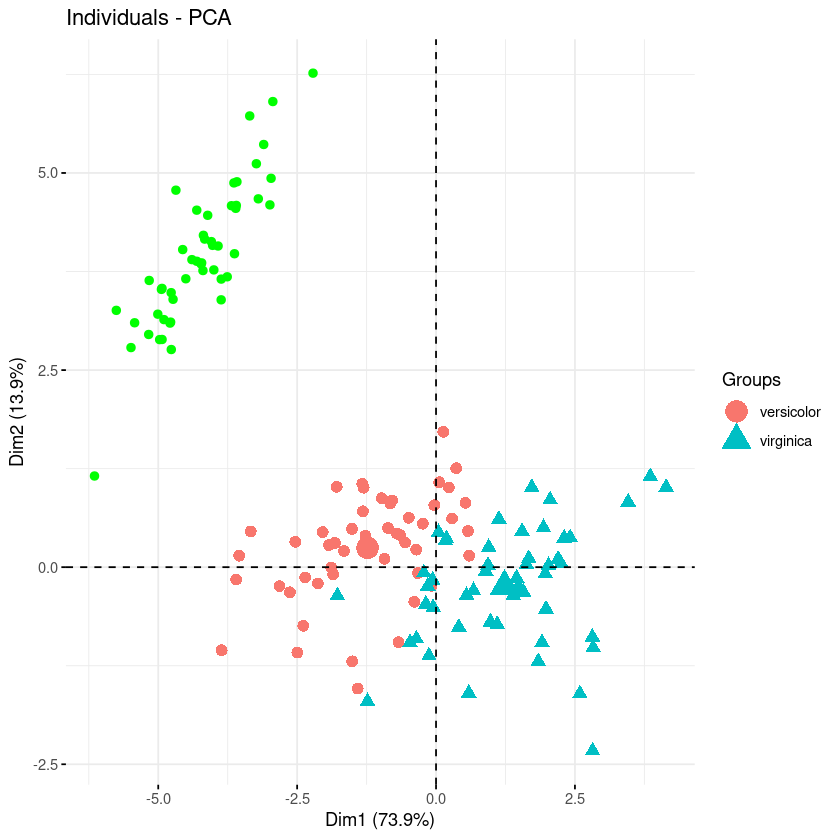

In [56]:
fviz_pca_ind(smallPCA, 
                habillage = irissmall$Species,
                geom = "point",
                pointsize = 3) + 
    geom_point(data = as.data.frame(setosaproj$coord), aes(x = Dim.1, y = Dim.2), size = 2, col = "green")

## The Metabolomics Dataset

The dataset we are using here comes from an untargeted metabolomics investigation (LC-QTOF) of a group of raspberry samples  of different variety and different color (Red, Yellow, Purple).

The biological experiment was designed to investigate the potential metabolic reprogramming when the fruit is not able to synthesize the pigments.

The analyticla method was optimized to extract secondary metabolites.

In a MS based untargeted metabolomics experiments the variables are the ions produced during the ionization of the neutral molecules

The data have been already pre-processed and no-missing values are anymore present in the data matrix



In [8]:
## get the data
load("data/RubusData.RData")

In [32]:
## let's give a look to the data
head(rubusData)

color,variety,mz55.01_rt1.4,mz57.03_rt4,mz57.03_rt1.4,mz57.03_rt7.8,mz59.01_rt1.8,mz59.01_rt1.4,mz59.01_rt2.4,mz59.01_rt10.9,⋯,mz799.21_rt29.2,mz799.23_rt21.9,mz799.23_rt20.7,mz799.24_rt1.6,mz799.25_rt3.2,mz799.24_rt2.3,mz799.31_rt33.4,mz799.3_rt25,mz799.36_rt27.3,mz799.28_rt21.9
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R,Ab,47.64042,314.5921,100.15406,25.65032,293.8096,355.7346,304.8100,90.43630,⋯,16.10310,253.14025,79.83458,48.13260,21.59266,7.028171,93.65011,7.615543,4.282347,228.23352
R,Ab,31.74719,322.3302,39.29389,12.82604,242.5204,242.0883,254.3362,74.32084,⋯,23.24910,299.25653,55.16202,43.53272,25.66665,14.036907,94.61129,9.256945,1.424710,292.42436
Y,AG,31.11493,218.6046,56.98358,30.47719,185.7597,129.0711,201.2166,108.49325,⋯,35.17463,72.13924,18.52807,8.44101,34.23434,9.844890,74.08585,56.564127,29.650095,70.77142
Y,AG,35.32106,235.2256,40.18146,16.98313,151.7327,201.9334,185.1117,108.49217,⋯,83.81969,270.57590,10.80888,12.65613,47.16566,9.913284,99.45719,112.772112,309.886020,230.69821
Y,AG,38.82398,305.4752,84.37450,15.20345,192.3417,306.5034,232.4534,100.12729,⋯,21.94245,54.19078,12.80134,15.34555,129.52870,133.747136,70.20584,76.752584,51.674633,24.73746
Y,An,24.08340,300.8691,73.03340,25.87538,448.0838,297.8812,277.5433,85.31066,⋯,20.38710,36.56882,10.81753,50.93523,42.42391,14.160260,72.55508,15.571229,25.920492,35.44425


Here the situation is different in comparison to what we had for the `iris`. The number of variables is indeed much bigger than the number of samples

In [57]:
dim(rubusData)

[1]    26 10988

PCA does not have particular problems in handling that, we could have some issues with the interpretation ...

In [59]:
## This code performs the PCA on the unit variance scalde data
rubusPCA <- PCA(rubusData  %>% select(starts_with("mz")),
               scale.unit = TRUE,
               graph = FALSE)
## as usual the summary function returns an informative textual summary of the results
summary(rubusPCA)


Call:
PCA(X = rubusData %>% select(starts_with("mz")), scale.unit = TRUE,  
     graph = FALSE) 


Eigenvalues
                        Dim.1    Dim.2    Dim.3    Dim.4    Dim.5    Dim.6
Variance             1997.078 1125.881  868.942  794.170  649.304  584.603
% of var.              18.180   10.249    7.910    7.230    5.911    5.322
Cumulative % of var.   18.180   28.429   36.340   43.569   49.480   54.802
                        Dim.7    Dim.8    Dim.9   Dim.10   Dim.11   Dim.12
Variance              535.444  501.382  427.562  397.475  378.407  336.058
% of var.               4.874    4.564    3.892    3.618    3.445    3.059
Cumulative % of var.   59.676   64.240   68.133   71.751   75.196   78.255
                       Dim.13   Dim.14   Dim.15   Dim.16   Dim.17   Dim.18
Variance              328.292  298.106  248.194  229.359  214.455  177.501
% of var.               2.989    2.714    2.259    2.088    1.952    1.616
Cumulative % of var.   81.243   83.957   86.217   88.305   90.2

The number of components to be consider could be determined by looking to the screeplot

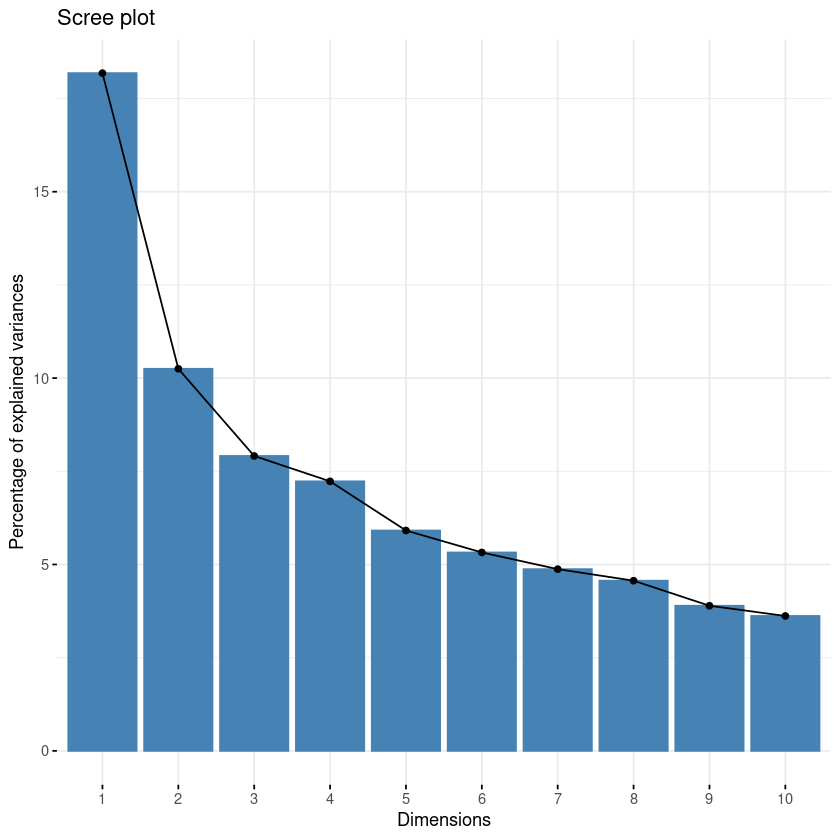

In [60]:
fviz_screeplot(rubusPCA)

The situation here is by far less clear than before. The variance explained by the first components is indeed smaller (~17% for the first one)

What we expect is then a less "representative" projection of the data. There is nothing bad on that, but we shouls always remember this aspect


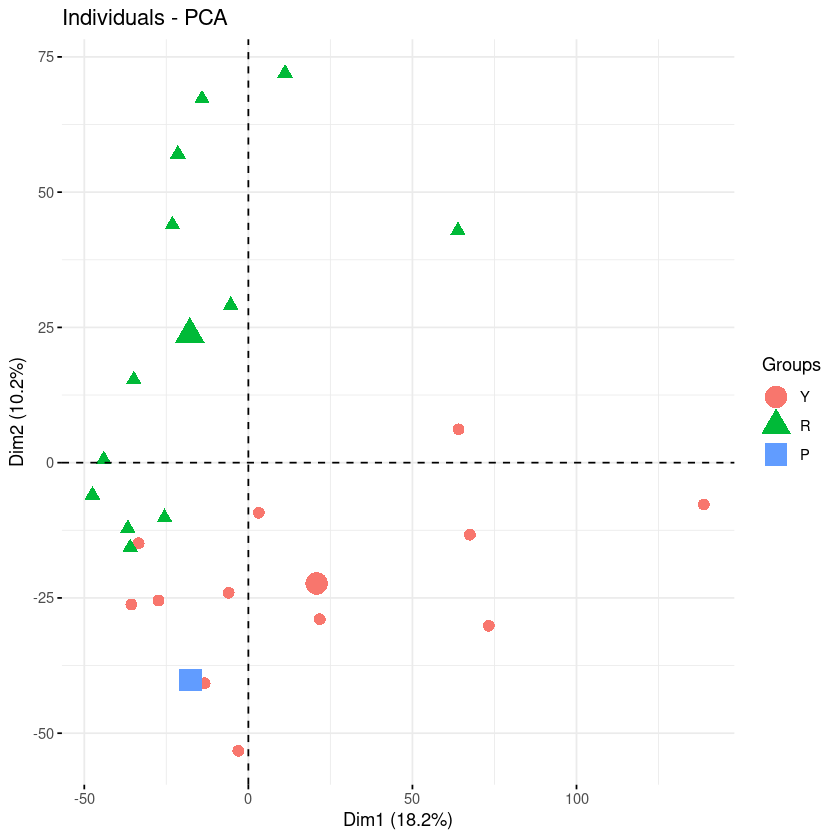

In [61]:
fviz_pca_ind(rubusPCA, 
             habillage = rubusData$color ,## use the specie as a color for the display
             label = "none",             ## hide individual labels
             repel = TRUE,                ## Avoid text overlapping (slow if many points)
             pointsize = 3)

The previous plot shows that we are actually able to see the color separation between the two color classess. 
This imply that this charactaristic is one of the big fators affecting the multivariate structure of our data. 

If we highlight the variety

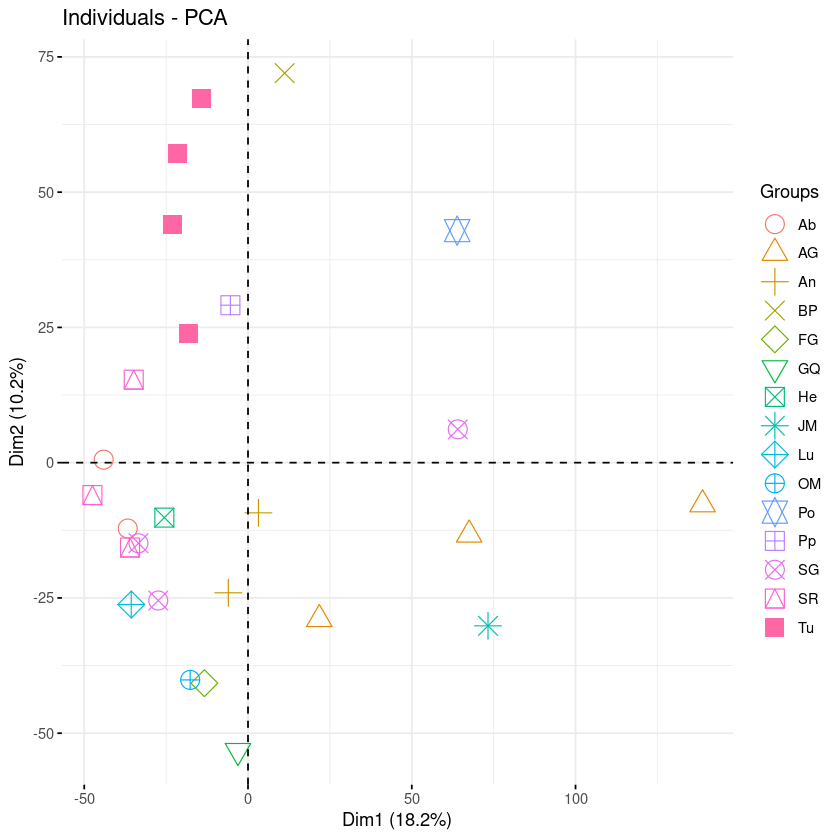

In [49]:
## PC1 vs PC2
fviz_pca_ind(rubusPCA, 
             habillage = rubusData$variety ,## use the specie as a color for the display
             label = "none",             ## hide individual labels
             repel = TRUE,                ## Avoid text overlapping (slow if many points)
             pointsize = 5,
             invisible = "quali")

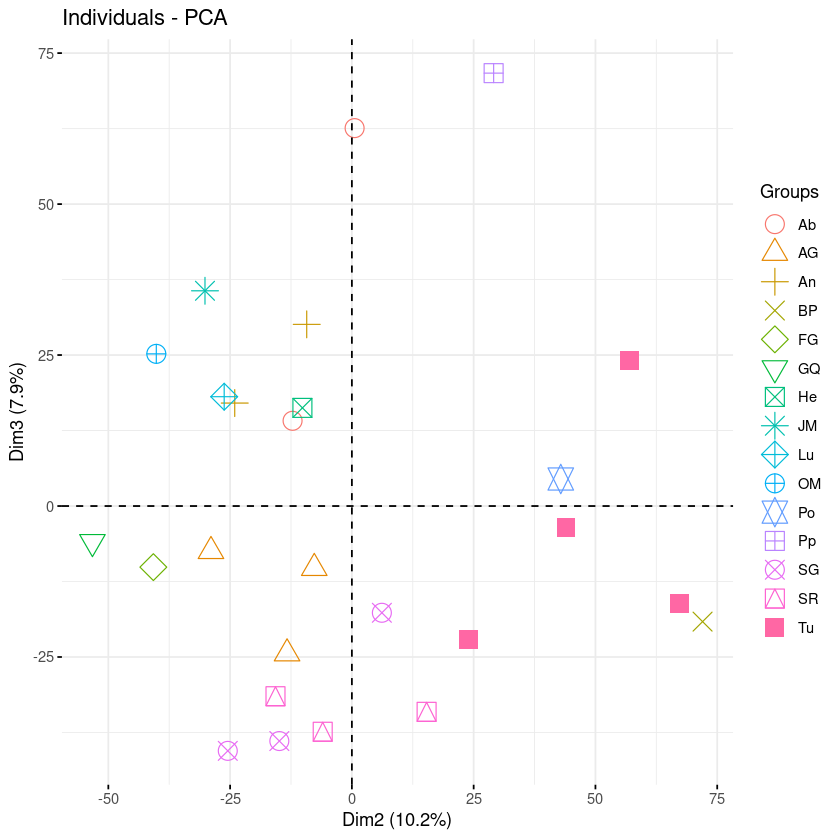

In [48]:
## PC2 vs PC3
fviz_pca_ind(rubusPCA, 
             habillage = rubusData$variety ,## use the specie as a color for the display
             label = "none",             ## hide individual labels
             repel = TRUE,                ## Avoid text overlapping (slow if many points)
             pointsize = 5,
             invisible = "quali", 
             axes = c(2,3))

Also the different varieties are separated, and this is telling us that each one of them is showing a somehow peculiar metabolic fingerprint

So far so good ... 

The natural subsequent step would be to try to identify the variables which are more important for the discrimination. Let's try with a biplot

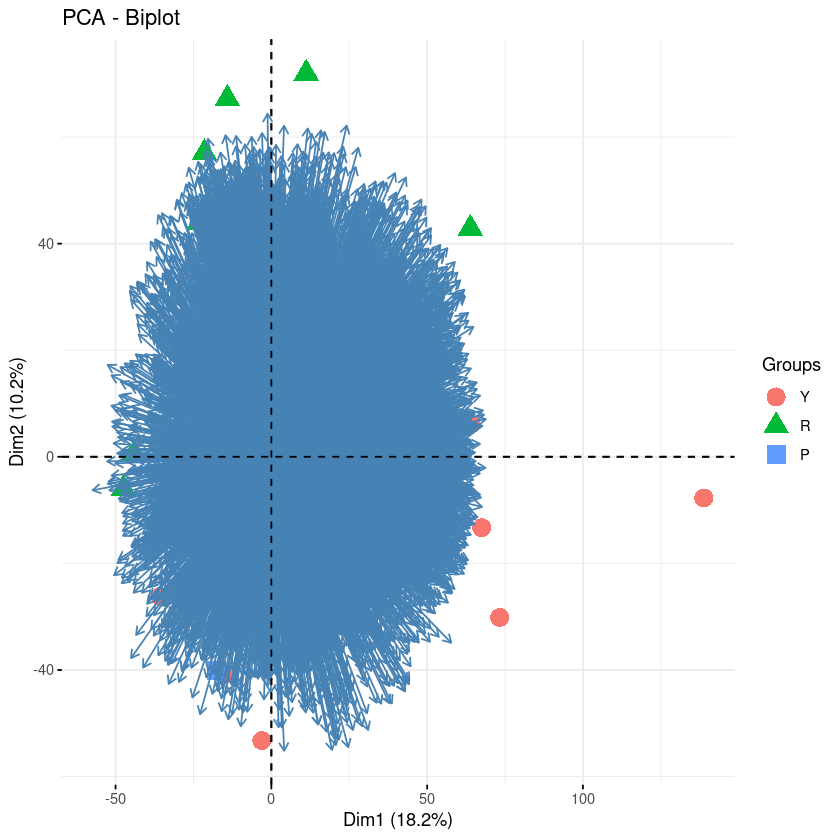

In [51]:
fviz_pca_biplot(rubusPCA, 
             habillage = rubusData$color ,## use the specie as a color for the display
             label = "none",             ## hide individual labels
             repel = TRUE,                ## Avoid text overlapping (slow if many points)
             pointsize = 5,
             invisible = "quali")

Ah, that's bad ... to many arrows of more or less the same length (by the way ... why?)

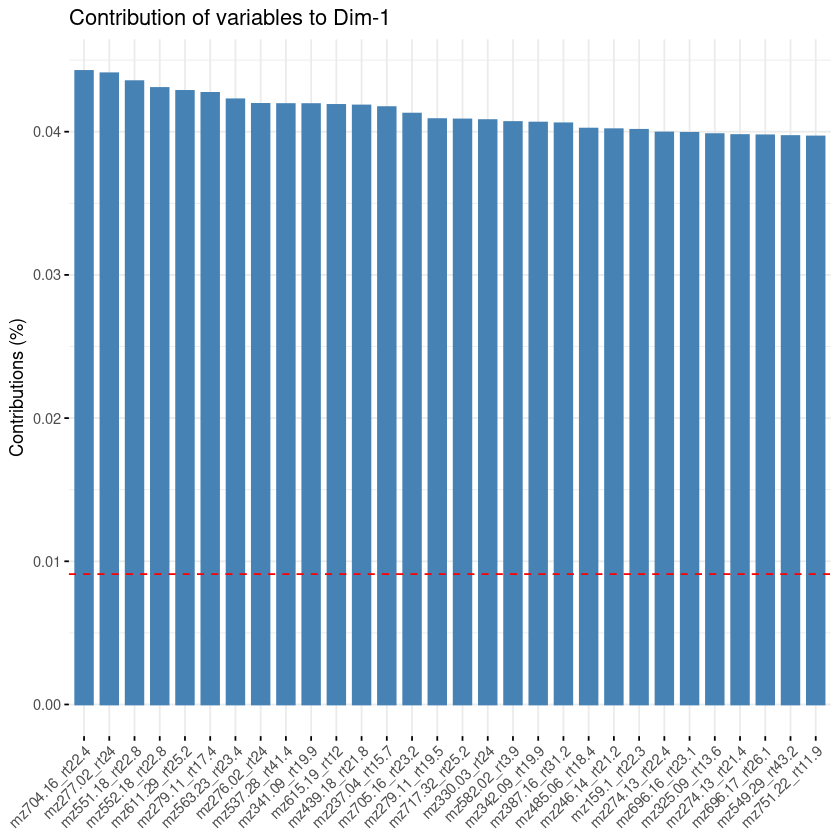

In [66]:
## another way to see the same thing
fviz_contrib(rubusPCA, "var", axes = 1, top = 30)

The plot shows the contribution of the "top" 30 variable to Dim-1. The red line highlights the average contribution. Difficult to interpret, isn't it?